<h3>Zero Initialization</h3>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

# Generate the moon-shaped data
X, y = make_moons(n_samples=100, noise=0.2, random_state=42) 

# Create a Pandas DataFrame
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'class': y})

df.head()

,X1,X2,class
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0


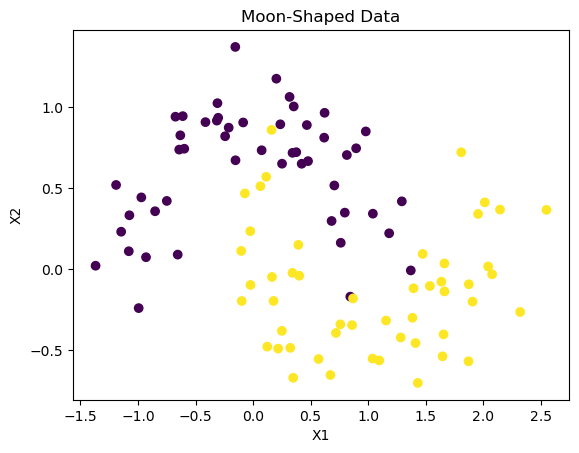

In [14]:
# Create the scatter plot
plt.scatter(df['X1'], df['X2'], c=df['class'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moon-Shaped Data')
plt.show()

In [15]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

<h5>Case 1: relu / tanh activation function in the hidden layers</h5>

In [40]:
# We will see that in essence no training really happens, as the weights continue to remain zero.

In [17]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.get_weights()

[array([[ 0.4965061 ,  0.27568924],
        [-1.0308563 ,  0.7570069 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.5432526],
        [0.7922863]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)


In [20]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.5516 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5555 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5320 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4812 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6937
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss

In [23]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.05472678], dtype=float32)]

In [24]:
# The weights are still zero, after training!

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

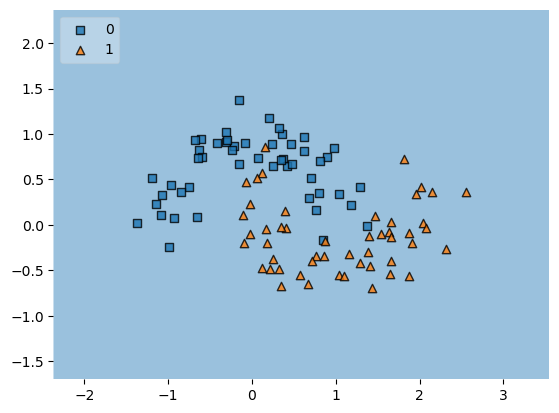

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

<h5>Case 2: sigmoid activation function in the hidden layers</h5>

In [41]:
# We will see that the model behaves as a simple perceptron, no matter how many nodes in a layer, or how many of layers!

In [26]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Set parameters to 0
model.get_weights()

[array([[ 0.84725654, -1.0451748 ],
        [ 0.24056816,  0.11102939]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.0157408],
        [-1.2883624]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.4594 - loss: 0.6932 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5320 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5477 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5320 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6939
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6940
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5359 - loss: 0.6928 - val_accuracy: 0.4000 - val_los

In [31]:
model.get_weights()

[array([[-0.45684138, -0.45684138],
        [ 0.46181402,  0.46181402]], dtype=float32),
 array([0.02394572, 0.02394572], dtype=float32),
 array([[-0.1645129],
        [-0.1645129]], dtype=float32),
 array([-0.01547697], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

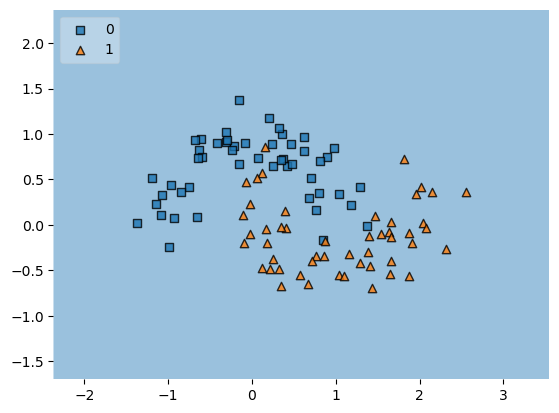

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [33]:
# Let's add few more nodes into hidden layer and see!

In [34]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.5633 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6941
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5437 - loss: 0.6927 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6940
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5359 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6941
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5281 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6946
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5047 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5672 - loss: 0.6920 - val_accuracy: 0.4000 - val_loss

In [38]:
model.get_weights()

[array([[-0.44150993, -0.44150993, -0.44150993, -0.44150993, -0.44150993,
         -0.44150993, -0.44150993, -0.44150993, -0.44150993, -0.44150993],
        [ 0.44588813,  0.44588813,  0.44588813,  0.44588813,  0.44588813,
          0.44588813,  0.44588813,  0.44588813,  0.44588813,  0.44588813]],
       dtype=float32),
 array([-0.08382265, -0.08382265, -0.08382265, -0.08382265, -0.08382265,
        -0.08382265, -0.08382265, -0.08382265, -0.08382265, -0.08382265],
       dtype=float32),
 array([[-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509],
        [-0.0846509]], dtype=float32),
 array([0.0590553], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

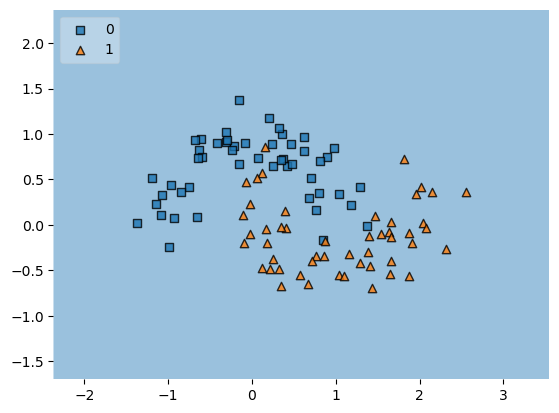

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

<h3>Non zero, constant initialization</h3>

In [48]:
# we will see that all neurons within same layer will behave as a single neuron, just like in the Case 2 of Zero Initialization

In [42]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.5070 - loss: 0.8710 - val_accuracy: 0.6000 - val_loss: 0.7906
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4836 - loss: 0.8937 - val_accuracy: 0.6000 - val_loss: 0.7878
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4563 - loss: 0.9295 - val_accuracy: 0.6000 - val_loss: 0.7850
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4875 - loss: 0.8858 - val_accuracy: 0.6000 - val_loss: 0.7824
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4563 - loss: 0.9325 - val_accuracy: 0.6000 - val_loss: 0.7797
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4406 - loss: 0.9398 - val_accuracy: 0.6000 - val_loss: 0.7770
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4992 - loss: 0.8688 - val_accuracy: 0.6000 - val_loss: 0.7744
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4875 - loss: 0.8861 - val_accuracy: 0.6000 - val_los

In [46]:
model.get_weights()

[array([[0.6525017 , 0.6525017 ],
        [0.25636986, 0.25636986]], dtype=float32),
 array([0.29977494, 0.29977494], dtype=float32),
 array([[0.29872012],
        [0.29872012]], dtype=float32),
 array([0.24347806], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

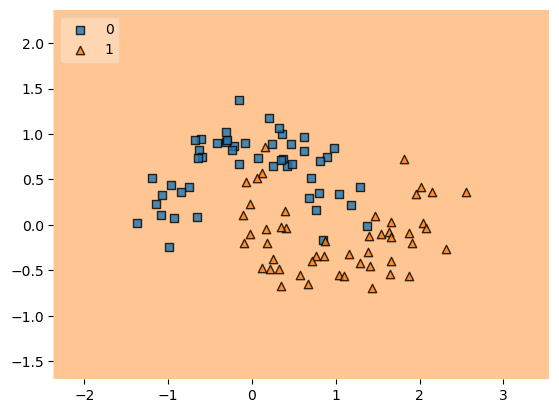

In [47]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

<h3>Random Initialization with small values</h3>

In [67]:
# we will see how this causes vanishing gradient problem and very slow convergence 

In [59]:
model = Sequential()

model.add(Dense(2, activation='tanh',input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.get_weights()

[array([[-0.69549346,  0.68578696],
        [ 0.85484874, -0.50374484]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.21361399,  1.0677952 ],
        [-0.11727822,  0.73023117]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.11345005, 0.48075604],
        [0.4675988 , 0.19250107]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.9395498 , -0.16041744],
        [-0.58262825,  0.35337865]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.0590137 ],
        [0.68218315]], dtype=float32),
 array([0.], dtype=float32)]

In [61]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1]) * 0.001
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1]) * 0.001
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1]) * 0.001
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1]) * 0.001
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1]) * 0.001
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[ 8.4388716e-04,  1.3656005e-05],
        [ 5.6067284e-04, -3.1562586e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00039297, -0.001181  ],
        [ 0.00140531, -0.00122401]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00063898,  0.00058973],
        [ 0.00024423, -0.00012493]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00192378,  0.00160923],
        [-0.00142193, -0.00047291]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.4260521e-03],
        [1.3136362e-05]], dtype=float32),
 array([0.], dtype=float32)]

In [62]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.4594 - loss: 0.6932 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4359 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5477 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6937
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5320 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6939
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5320 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss

In [64]:
model.get_weights()

[array([[ 0.36040953,  0.3680365 ],
        [-0.36428368, -0.37333515]], dtype=float32),
 array([-0.04713395, -0.04920739], dtype=float32),
 array([[ 0.37413085, -0.36751047],
        [ 0.3833199 , -0.3749234 ]], dtype=float32),
 array([-0.05054481,  0.04703643], dtype=float32),
 array([[-0.35099873,  0.35101748],
        [ 0.3492589 , -0.34922028]], dtype=float32),
 array([ 0.08504314, -0.08503252], dtype=float32),
 array([[ 0.26312682,  0.26707944],
        [-0.2663862 , -0.266034  ]], dtype=float32),
 array([0.08632012, 0.08740041], dtype=float32),
 array([[-0.16974385],
        [-0.1710814 ]], dtype=float32),
 array([-0.06234993], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

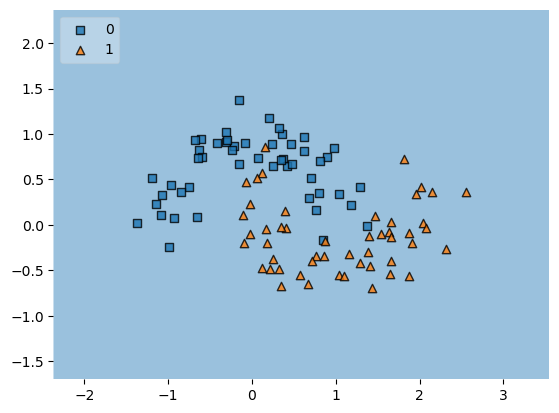

In [65]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

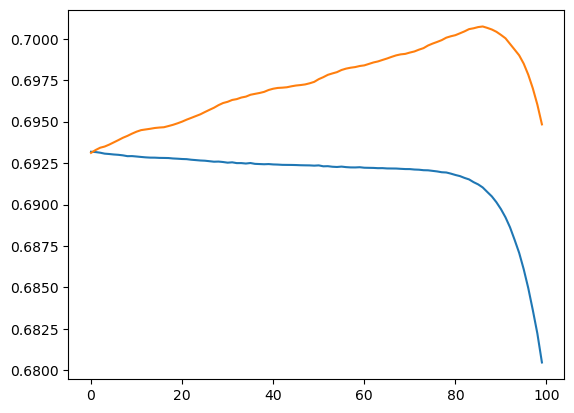

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

<h3>Random Initialization with large values</h3>

In [75]:
# Something like exploding gradient problem

In [68]:
model = Sequential()

model.add(Dense(2, activation='tanh',input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1]) * 100
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1]) * 100
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1]) * 100
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1]) * 100
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1]) * 100
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[ 84.83749 , -19.145102],
        [-44.05197 , -45.84586 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ -66.81365, -136.12111],
        [-141.7314 , -106.57427]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-130.41733 ,  115.95773 ],
        [  71.80128 ,   22.257523]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[60.31409 , 28.969837],
        [66.68181 , 32.398148]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 35.052643],
        [172.49577 ]], dtype=float32),
 array([0.], dtype=float32)]

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.4406 - loss: 115.8929 - val_accuracy: 0.4500 - val_loss: 113.9451
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4250 - loss: 119.1232 - val_accuracy: 0.4500 - val_loss: 113.9383
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4133 - loss: 121.5439 - val_accuracy: 0.4500 - val_loss: 113.9314
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4406 - loss: 115.8716 - val_accuracy: 0.4500 - val_loss: 113.9244
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4523 - loss: 113.4371 - val_accuracy: 0.4500 - val_loss: 113.9173
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4211 - loss: 119.9016 - val_accuracy: 0.4500 - val_loss: 113.9100
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4055 - loss: 123.1327 - val_accuracy: 0.4500 - val_loss: 113.9028
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3625 - loss: 132.0229 - v

In [78]:
model.get_weights()

[array([[ 84.83749 , -19.145102],
        [-44.05197 , -45.84586 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ -66.81365, -136.12111],
        [-141.7314 , -106.57427]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-130.41733 ,  115.95773 ],
        [  71.80128 ,   22.257523]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[60.74744 , 29.402946],
        [66.24855 , 31.965017]], dtype=float32),
 array([-0.44393963, -0.44378573], dtype=float32),
 array([[ 34.755383],
        [172.19928 ]], dtype=float32),
 array([-0.27068564], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

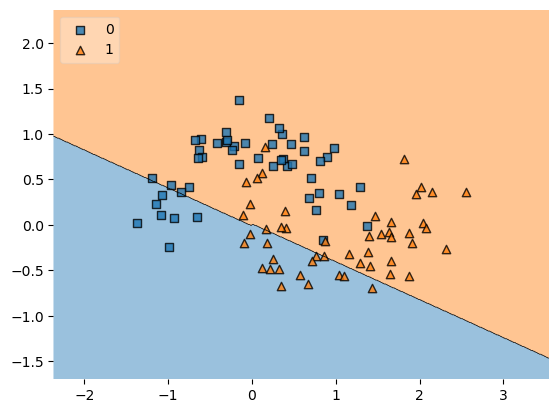

In [79]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)